# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

K-means clustering: suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan algoritme untuk membagi n pengamatan menjadi k kelompok (partisi) sedemikian rupa hingga tiap pengamatan termasuk ke dalam kelompok dengan rata-rata terdekat (titik tengah kelompok).




---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [48]:
df['Umur'].unique()

array([ 19.,  21.,  20.,  23.,  31.,  22.,  35.,  64.,  30.,  67.,  58.,
        24.,  37.,  52.,  25.,  46.,  54.,  29.,  45.,  40.,  60.,  53.,
        18.,  49.,  42.,  36.,  65.,  48.,  50.,  27.,  33.,  59.,  47.,
        51.,  69.,  70.,  63.,  43.,  68.,  32.,  26.,  57.,  38.,  55.,
        34.,  66.,  39.,  44.,  28.,  56.,  41.,  nan, 120.])

# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [19]:
#code here
df.fillna(method='ffill', inplace=True)
df

def remove_outlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [20]:
df_outlier_removed = remove_outlier(df[['Umur', 'Skor Belanja (1-100)']])

df_outlier_removed.dropna(axis=0, inplace=True)

df_outlier_removed

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


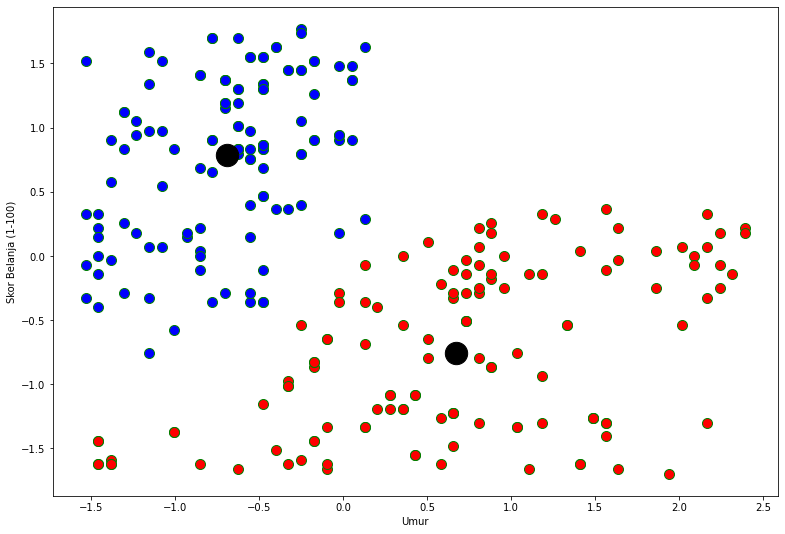

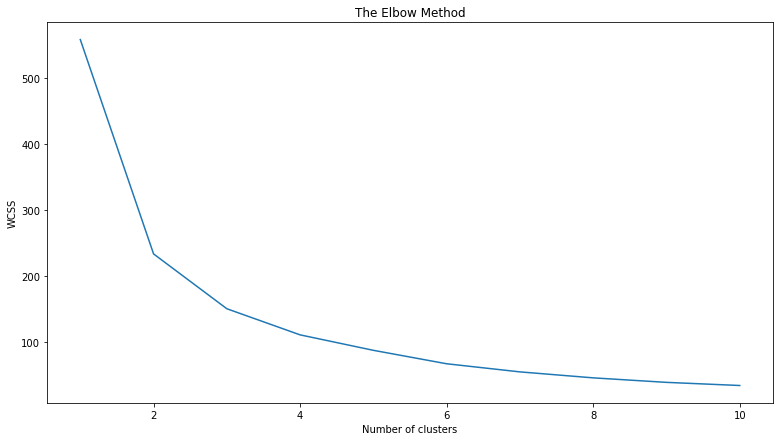

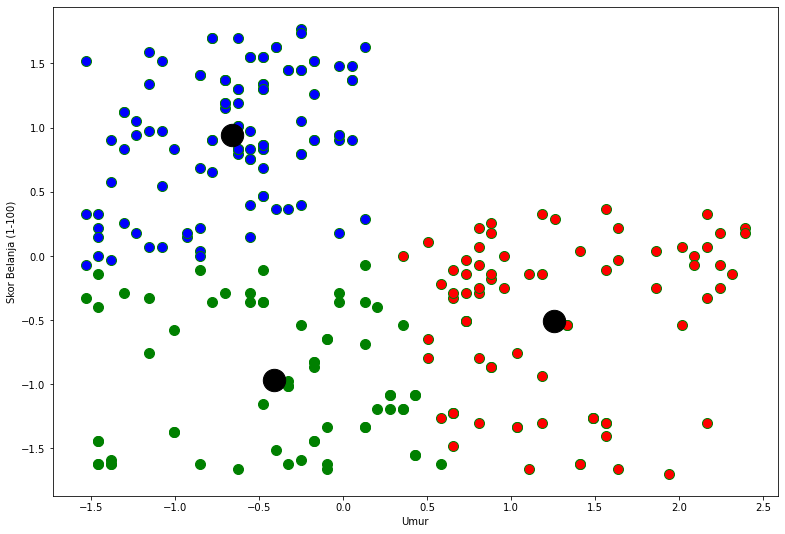

0.4890185295205997
0.5831289667352703


In [45]:
import warnings
warnings.filterwarnings("ignore")

sc = StandardScaler()
df_outlier_std = sc.fit_transform(df_outlier_removed.astype(float))

kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_outlier_std)
labels1 = kmeans1.labels_

new_dfoutlier_std = pd.DataFrame(data=df_outlier_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_dfoutlier_std['label_kmeans1'] = labels1

plt.subplots(figsize=(13,9))
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans1==0], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans1==0], c='blue', s=100, edgecolor='green')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans1==1], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans1==1], c='red', s=100, edgecolor='green')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

plt.subplots(figsize=(13,7))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_outlier_std)
labels2 = kmeans2.labels_

new_dfoutlier_std = pd.DataFrame(data=df_outlier_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_dfoutlier_std['label_kmeans2'] = labels2

plt.subplots(figsize=(13,9))
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2==0], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2==0], c='green', s=100, edgecolor='green')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2==1], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2==1], c='red', s=100, edgecolor='green')
plt.scatter(new_dfoutlier_std.Umur[new_dfoutlier_std.label_kmeans2==2], new_dfoutlier_std['Skor Belanja (1-100)'][new_dfoutlier_std.label_kmeans2==2], c='blue', s=100, edgecolor='green')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

from sklearn.metrics import silhouette_score

print(silhouette_score(new_dfoutlier_std, labels=labels1))
print(silhouette_score(new_dfoutlier_std, labels=labels2))

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Cluster merah menunjukkan umur 35 ke atas memiliki skor belanja kurang dari 50.
Cluster hijau menunjukkan umur 35 ke bawah memiliki skor belanja yang lebih rendah daripada cluster biru.

Segmentasi pelanggan 35 ke atas yang memiliki skor belanja rendah perlu adanya promo-promo menarik yang bisa meningkatkan income supermarket karena mereka yang mungkin tidak biasa berbelanja secara impulsif dibanding yang berumur 35 ke bawah.